In [2471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2472]:
df=pd.read_excel('Bharati_Airtel.xlsx',parse_dates=True,index_col=0)

In [2473]:
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-09-04,EQ,865.75,869.45,859.70,865.95,862.10,865.30,864.14,901.4,686.2,3102649,2.681133e+09,106343
2023-09-01,EQ,853.15,867.55,852.75,856.40,864.35,865.95,862.18,901.4,686.2,4427899,3.817652e+09,146461
2023-08-31,EQ,855.50,859.50,847.05,857.75,857.05,856.40,856.37,901.4,686.2,12528190,1.072881e+10,148103
2023-08-30,EQ,859.85,862.60,856.45,855.20,858.15,857.75,859.54,901.4,686.2,3261665,2.803520e+09,94793
2023-08-29,EQ,870.00,870.00,848.50,870.35,855.30,855.20,855.42,901.4,686.2,14064286,1.203084e+10,174320


In [2474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-09-04 to 2022-09-05
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series         254 non-null    object 
 1   OPEN           254 non-null    float64
 2   HIGH           254 non-null    float64
 3   LOW            254 non-null    float64
 4   PREV. CLOSE    254 non-null    float64
 5   ltp            254 non-null    float64
 6   close          254 non-null    float64
 7   vwap           254 non-null    float64
 8   52W H          254 non-null    float64
 9   52W L          254 non-null    float64
 10  VOLUME         254 non-null    int64  
 11  VALUE          254 non-null    float64
 12  No of trades   254 non-null    int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 27.8+ KB


<Axes: xlabel='Date '>

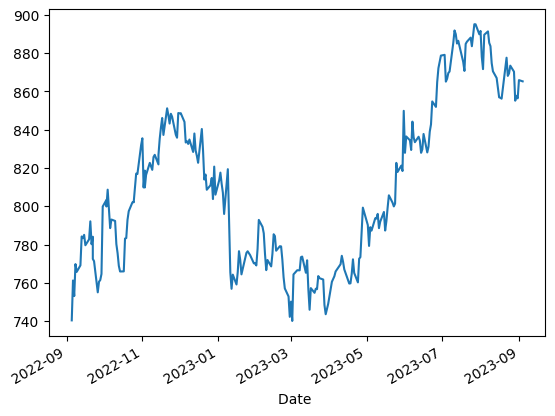

In [2475]:
df['close '].plot()

In [2476]:
len(df)

254

In [2477]:
airtel_close=df['close ']

In [2478]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(254,)

In [2479]:
airtel_close=pd.DataFrame(airtel_close)

In [2480]:
train=airtel_close.iloc[:238]
test=airtel_close.iloc[238:]

In [2481]:
from sklearn.preprocessing import MinMaxScaler

In [2482]:
scaler=MinMaxScaler()

In [2483]:
scaler.fit(train)

MinMaxScaler()

In [2484]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [2485]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

CREATING THE MODEL

In [2486]:
test.shape

(16, 1)

In [2487]:
length=16
batch_size=32

generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=batch_size)

In [2488]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [2489]:
n_features=1

In [2490]:
model=Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [2491]:
model.summary()

Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_99 (SimpleRNN)   (None, 30)                960       
                                                                 
 dropout_99 (Dropout)        (None, 30)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [2492]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


<ipython-input-2492-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


7/7 [==============================] - 1s 6ms/step - loss: 0.0678
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0274
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 8/10
7/7 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 10/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0137


In [2493]:
losses=pd.DataFrame(model.history.history)

<Axes: >

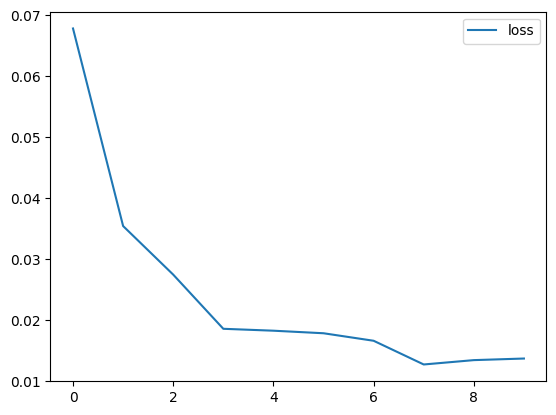

In [2494]:
losses.plot()

EVALUATE TEST SET

In [2495]:
first_eval_batch=scaled_train[-length:]

In [2496]:
first_eval_batch

array([[0.16704289],
       [0.16672041],
       [0.18574653],
       [0.22863592],
       [0.2592712 ],
       [0.33698807],
       [0.34182522],
       [0.31280232],
       [0.44243792],
       [0.38568204],
       [0.40793292],
       [0.38568204],
       [0.15833602],
       [0.13769752],
       [0.13221541],
       [0.09642051]])

In [2497]:

first_eval_batch=first_eval_batch.reshape((1,length,1))

In [2498]:
first_eval_batch

array([[[0.16704289],
        [0.16672041],
        [0.18574653],
        [0.22863592],
        [0.2592712 ],
        [0.33698807],
        [0.34182522],
        [0.31280232],
        [0.44243792],
        [0.38568204],
        [0.40793292],
        [0.38568204],
        [0.15833602],
        [0.13769752],
        [0.13221541],
        [0.09642051]]])

In [2499]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 147ms/step


array([[0.16243458]], dtype=float32)

In [2500]:
scaled_test[0]

array([0.20154789])

In [2501]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)





1/1 [==============================] - 0s 21ms/step


In [2502]:
test_predictions

[array([0.16243458], dtype=float32),
 array([0.16894501], dtype=float32),
 array([0.16067547], dtype=float32),
 array([0.22552402], dtype=float32),
 array([0.11234992], dtype=float32),
 array([0.12816757], dtype=float32),
 array([0.18439817], dtype=float32),
 array([0.08164249], dtype=float32),
 array([0.15732104], dtype=float32),
 array([0.120737], dtype=float32),
 array([0.02958325], dtype=float32),
 array([0.1260731], dtype=float32),
 array([0.09220286], dtype=float32),
 array([0.053703], dtype=float32),
 array([0.15008166], dtype=float32),
 array([0.08519498], dtype=float32)]

In [2503]:
true_predictions=scaler.inverse_transform(test_predictions)

In [2504]:
true_predictions

array([[765.28548131],
       [766.29492449],
       [765.01273101],
       [775.06749979],
       [757.51985509],
       [759.97238167],
       [768.69093692],
       [752.75866863],
       [764.49262661],
       [758.82027205],
       [744.68688366],
       [759.64763526],
       [754.396053  ],
       [748.42665056],
       [763.37016205],
       [753.30948205]])

In [2505]:
test['predictions']=true_predictions

<ipython-input-2505-5cc117e29ae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


In [2506]:
test

,close,predictions
238,771.35,765.285481
239,772.50,766.294924
240,784.10,765.012731
241,780.20,775.067500
242,792.15,757.519855
243,782.75,759.972382
244,779.65,768.690937
245,785.10,752.758669
246,783.35,764.492627
247,784.25,758.820272


<Axes: >

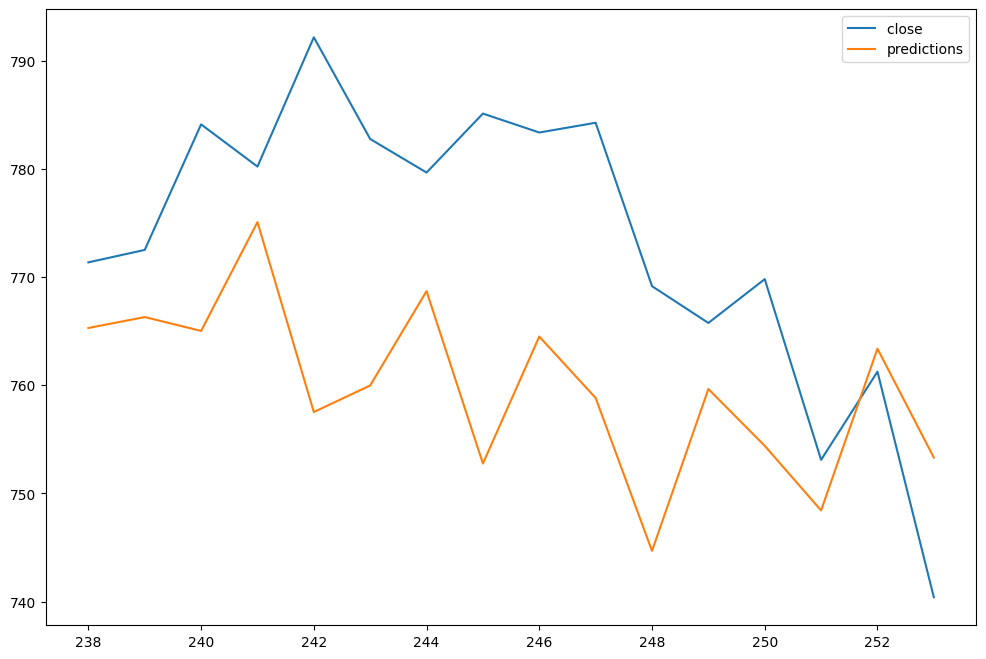

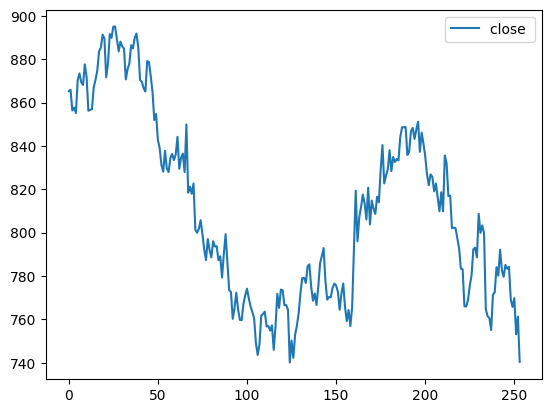

In [2507]:
test.plot(figsize=(12,8))
airtel_close.plot()

LET US CREATE FULL MODEL

In [2508]:
full_scaler=MinMaxScaler()

scaled_full_data=full_scaler.fit_transform(airtel_close)

In [2509]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,batch_size=32)

In [2510]:
model=Sequential()

model.add(SimpleRNN(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [2511]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_100 (SimpleRNN)  (None, 30)                960       
                                                                 
 dropout_100 (Dropout)       (None, 30)                0         
                                                                 
 dense_100 (Dense)           (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [2512]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


<ipython-input-2512-b5005ef83afd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


8/8 [==============================] - 1s 4ms/step - loss: 0.0777
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0276
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0188
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 10/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0131


In [2513]:
full_model_losses=pd.DataFrame(model.history.history)

<Axes: >

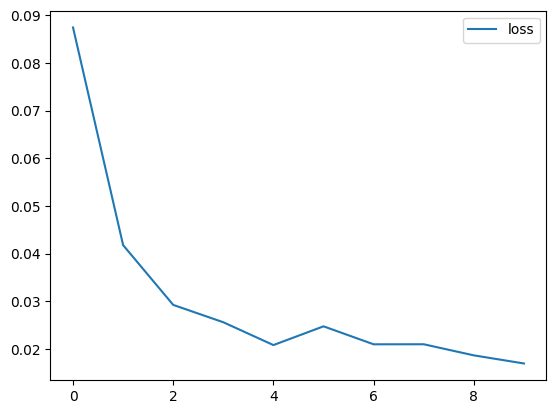

In [2469]:
full_model_losses.plot()

In [2515]:
forecast=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(20):
  current_pred=model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 21ms/step


In [2516]:
forecast=scaler.inverse_transform(forecast)

In [2517]:
forecast

array([[759.19018034],
       [758.9280476 ],
       [759.02226096],
       [766.88626161],
       [764.68589598],
       [768.42055019],
       [774.35650345],
       [767.82007996],
       [774.07018403],
       [772.96474499],
       [762.26801075],
       [770.70988567],
       [768.11950181],
       [764.62780727],
       [769.38847273],
       [767.28185028],
       [767.10105952],
       [771.99495332],
       [767.87343923],
       [772.37643222]])

In [2518]:
forecast.flatten()

array([759.19018034, 758.9280476 , 759.02226096, 766.88626161,
       764.68589598, 768.42055019, 774.35650345, 767.82007996,
       774.07018403, 772.96474499, 762.26801075, 770.70988567,
       768.11950181, 764.62780727, 769.38847273, 767.28185028,
       767.10105952, 771.99495332, 767.87343923, 772.37643222])

In [2519]:
df_array=np.array(airtel_close)
df_array

array([[865.3 ],
       [865.95],
       [856.4 ],
       [857.75],
       [855.2 ],
       [870.35],
       [873.5 ],
       [869.45],
       [868.15],
       [877.65],
       [871.95],
       [856.25],
       [856.7 ],
       [856.95],
       [867.05],
       [870.55],
       [874.8 ],
       [883.7 ],
       [885.4 ],
       [891.4 ],
       [889.65],
       [871.7 ],
       [878.1 ],
       [891.65],
       [889.9 ],
       [895.1 ],
       [895.15],
       [889.4 ],
       [883.65],
       [888.15],
       [886.  ],
       [884.85],
       [870.75],
       [875.45],
       [878.1 ],
       [886.5 ],
       [885.05],
       [889.95],
       [891.9 ],
       [885.4 ],
       [870.45],
       [869.65],
       [866.65],
       [865.15],
       [879.15],
       [878.75],
       [872.2 ],
       [864.9 ],
       [851.95],
       [854.8 ],
       [842.8 ],
       [839.  ],
       [831.2 ],
       [828.15],
       [837.8 ],
       [829.7 ],
       [827.95],
       [834.35],
       [836.35

In [2520]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

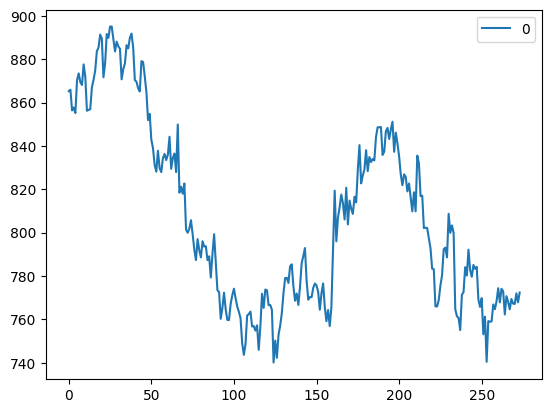

In [2521]:
full_data.plot()

LSTM  MODEL




In [2523]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [2524]:
length

16

In [2525]:
scaled_test.shape

(16, 1)

In [2542]:
length=15

generator=TimeseriesGenerator(scaled_train,scaled_train,
                              length=length,batch_size=32)

validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                         length=length,batch_size=32)

In [2543]:
model=Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))

model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [2544]:
model.fit_generator(generator,epochs=30,validation_data=validation_generator,callbacks=[early_stop],shuffle=False)

Epoch 1/30


<ipython-input-2544-72d3e58ee897>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=30,validation_data=validation_generator,callbacks=[early_stop],shuffle=False)


1/7 [===>..........................] - ETA: 17s - loss: 1.0323

7/7 [==============================] - 4s 93ms/step - loss: 0.2899 - val_loss: 0.0030
Epoch 2/30
7/7 [==============================] - 0s 15ms/step - loss: 0.1917 - val_loss: 0.0163
Epoch 3/30
7/7 [==============================] - 0s 15ms/step - loss: 0.1138 - val_loss: 0.0427


In [2546]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred=model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 23ms/step


<ipython-input-2547-4c88822f2ef9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_predictions']=true_predictions


<Axes: >

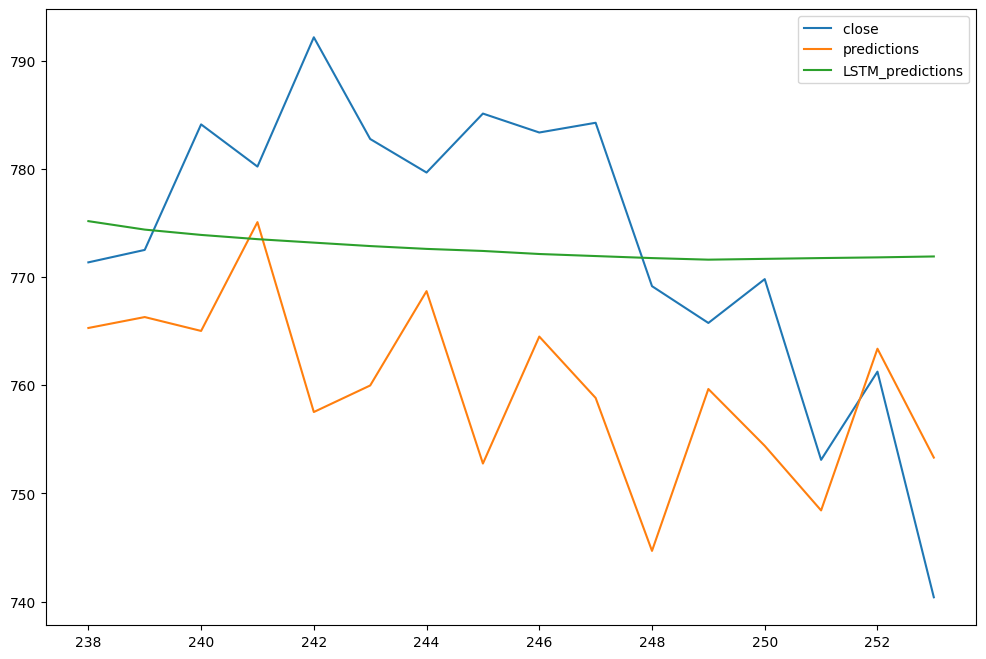

In [2547]:
true_predictions=scaler.inverse_transform(test_predictions)
test['LSTM_predictions']=true_predictions
test.plot(figsize=(12,8))

In [2548]:
forecast=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(15):
  current_pred=model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 27ms/step


In [2549]:
forecast=scaler.inverse_transform(forecast)

In [2550]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<Axes: >

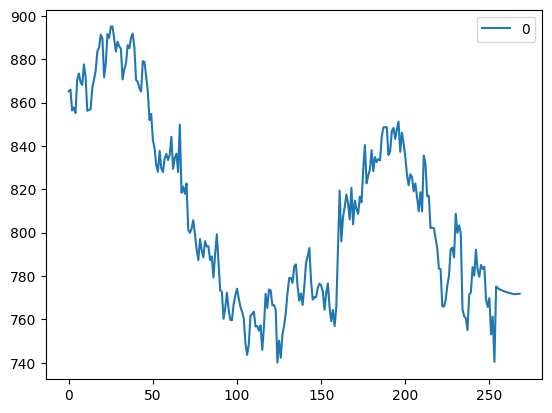

In [2551]:
full_data.plot()

In [2552]:
forecast

array([[775.158988  ],
       [774.37717714],
       [773.88587449],
       [773.49382078],
       [773.17410878],
       [772.85607184],
       [772.59465649],
       [772.40372296],
       [772.1224911 ],
       [771.93279134],
       [771.7450231 ],
       [771.59905737],
       [771.67287545],
       [771.74640473],
       [771.81017246]])

In [2553]:
full_data.tail(30)

,0
239,772.500000
240,784.100000
241,780.200000
242,792.150000
243,782.750000
244,779.650000
245,785.100000
246,783.350000
247,784.250000
248,769.150000
